In [ ]:
'''
I have yelp,amazon,IMDB movie review data in text form 
i want to make ai application wwhich is capable to do sentiment analysis 
for that we need NLP + machine learning 

in this case study labeled data is being used 
0 : negative 
1 : positive 

we are gonna use NLTK for text preprocessing 


In [32]:
# import required all moduless 

import pandas as pd 
import numpy as np 
import pickle
import sys
import os
import io
import re
from sys import path 

# import ML modules 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from string import punctuation, digits
from IPython.core.display import display, HTML

#NLTK text preprocessing 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

# let's take data from file 

In [2]:
# amazon data
input_file="amazon_cells_labelled.txt"
amazon=pd.read_csv(input_file,delimiter='\t',header=None)
amazon.columns=['Sentence','Class']

#yelp Data 
input_file="yelp_labelled.txt"
yelp=pd.read_csv(input_file,delimiter='\t',header=None)
yelp.columns=['Sentence','Class']

#imdb data
input_file="imdb_labelled.txt"
imdb=pd.read_csv(input_file,delimiter='\t',header=None)
imdb.columns=['Sentence','Class']

In [3]:
# combine all dataset togather 
data=pd.DataFrame()
data=pd.concat([amazon,yelp,imdb])
data['index']=data.index

In [4]:
data

,Sentence,Class,index
0,So there is no way for me to plug it in here i...,0,0
1,"Good case, Excellent value.",1,1
2,Great for the jawbone.,1,2
3,Tied to charger for conversations lasting more...,0,3
4,The mic is great.,1,4
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,743
744,"Unfortunately, any virtue in this film's produ...",0,744
745,"In a word, it is embarrassing.",0,745
746,Exceptionally bad!,0,746


In [ ]:
'''
class columns 
0= negative 
1= positive 

'''

# Let's do statistical analysis 

In [14]:
# Total count of each category 
pd.set_option('display.width',4000)
pd.set_option('display.max_rows',1000)
distOfDetails = data.groupby(by='Class', as_index=False).agg({'index': pd.Series.nunique}).sort_values(by='index', ascending=False)
distOfDetails.columns =['Class', 'COUNT']
print(distOfDetails)

   Class  COUNT
0      0    846
1      1    827


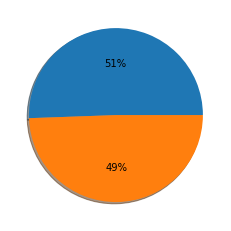

In [15]:
# check percentage of negative vs positive review using pie plot 
plt.pie(distOfDetails['COUNT'],autopct='%1.0f%%',shadow=True, startangle=360)
plt.show()

In [16]:
# data is highly balanced 
'''
the next step is text preprocessing 
'''

'\nthe next step is text preprocessing \n'

In [17]:
columns=['index','Class','Sentence']
df_=pd.DataFrame(columns=columns)

In [18]:
df_.head()

,index,Class,Sentence


In [19]:
# convert sentence data case into lower case
data['Sentence']=data['Sentence'].str.lower()

In [20]:
#remove email address
data['Sentence']=data['Sentence'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+','', regex=True)

In [21]:
#remove IP address
data['Sentence'] = data['Sentence'].replace('((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}', '', regex=True)

In [22]:
#remove punctaitions and special chracters #white space 
data['Sentence'] = data['Sentence'].str.replace('[^\w\s]','')

In [23]:
#remove stop words
for index, row in data.iterrows():
    word_tokens = word_tokenize(row['Sentence'])
    filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')]
    df_ = df_.append({"index": row['index'], "Class":  row['Class'],"Sentence": " ".join(filtered_sentence[0:])}, ignore_index=True)
data = df_

In [26]:
data

,index,Class,Sentence
0,0,0,way plug us unless go converter
1,1,1,good case excellent value
2,2,1,great jawbone
3,3,0,tied charger conversations lasting 45 minutesm...
4,4,1,mic great
...,...,...,...
2743,743,0,got bored watching jessice lange take clothes
2744,744,0,unfortunately virtue films production work los...
2745,745,0,word embarrassing
2746,746,0,exceptionally bad


In [27]:
df_

,index,Class,Sentence
0,0,0,way plug us unless go converter
1,1,1,good case excellent value
2,2,1,great jawbone
3,3,0,tied charger conversations lasting 45 minutesm...
4,4,1,mic great
...,...,...,...
2743,743,0,got bored watching jessice lange take clothes
2744,744,0,unfortunately virtue films production work los...
2745,745,0,word embarrassing
2746,746,0,exceptionally bad


In [28]:
#x=data['Sentence'].values.astype('U')
#y=data['Class'].values.astype('int32')

X_train, X_test, y_train, y_test = train_test_split(data['Sentence'].values.astype('U'),
                                                    data['Class'].values.astype('int32'),
                                                    test_size=0.10, random_state=0)
classes  = data['Class'].unique()
#sentence is feature 
#Class is target 

In [30]:
X_train

array(['food really boring',
       'dont afraid subtitles worth little aversion therapy 1010',
       'fantastic buy get whatever next phone', ...,
       'much flavor poorly constructed', 'place good film garbage',
       'lovely usual cutie'], dtype='<U5212')

In [33]:
#grid search result
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2') 
#feature engineering done and we get count feature 
counts = vectorizer.fit_transform(X_train)
vocab = vectorizer.vocabulary_

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier #stochastic gradient descent 

In [35]:
classifier = SGDClassifier(alpha=1e-05,max_iter=50,penalty='elasticnet')

In [36]:
#target 
targets = y_train
classifier = classifier.fit(counts, targets)
#convert x_text into tfidf vector 
example_counts = vectorizer.transform(X_test)
#predict 
predictions = classifier.predict(example_counts)

In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [39]:
#Model Evaluation
acc = accuracy_score(y_test, predictions, normalize=True)
hit = precision_score(y_test, predictions, average=None,labels=classes)
capture = recall_score(y_test, predictions, average=None,labels=classes)
print('Model Accuracy:%.2f'%acc)
print(classification_report(y_test, predictions))

Model Accuracy:0.80
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       139
           1       0.82      0.76      0.79       136

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275



In [40]:
confusion_matrix(y_test, predictions)

array([[116,  23],
       [ 32, 104]], dtype=int64)